# Sentiment Analysis through Unsupervised Learning

In this jupyter notebook, I will show you how to apply sentiment analysis to a text through an Unsupervised Learning (UL) technique, based on the AFINN lexicon. This tutorial exploits the `afinn` Python package, which is available only for English and Danish. If your text is written into a different language, you could translate it before in English and use the `afinn` package.

This notebook applies sentiment analysis the the Saint Augustine Confessions, which can be downloaded from the [Gutemberg Project Page](https://www.gutenberg.org/files/3296/3296-h/3296-h.htm). The masterpiece is split in 13 books. We have stored each book into a different file, named number.text (e.g. 1.txt and 2.txt). Each line of every file contains just one sentence.

First of all import the `Afinn` class from the `afinn` package. 

In [74]:
from afinn import Afinn

Then create a new `Afinn` object, by specifying the used language.

In [75]:
afinn = Afinn(language='en')

The `afinn` object contains a method, called `score()`, which receives a sentence as input and returns a score as output. The score may be either positive, negative or neutral. We calculate the score of a book, simply by summing all the scores of all the sentence of that book. We define three variables> pos, neg and neutral, which store respectively the sum of all the positive, negative and neutral scores of all the sentences of a book.

Firstly, we define three indexes, which will be used after.

In [79]:
pos_index = []
neg_index = []
neutral_index = []

We open the file corresponding to each book through the `open()` function, we read all the lines through the function `file.readlines()` and for each line, we calculate the score.

Then, we can define three indexes to calculate the sentiment of a book: the positive sentiment index (pi), the negative sentiment index (ni) and the neutral sentiment index (nui). The pi of a book corresponds to the number of positive sentences in a book divided per the total number of sentences of the book. Similarly, we can calculate the ni and nui of a book.

In [81]:
for book in range(1,14):
    file = open('sources/' + str(book) + '.txt')
    lines = file.readlines()
    pos = 0
    neg = 0
    neutral = 0
    
    for line in lines:
        score = int(afinn.score(line))
        
        if score > 0:
            pos += 1
        elif score < 0:
            neg += 1
        else:
            neutral += 1
        
    n = len(lines)
    pos_index.append(pos / n)
    neg_index.append(neg / n)
    neutral_index.append(neutral / n)

Finally, we can plot results, by using the `matplotlib` package.

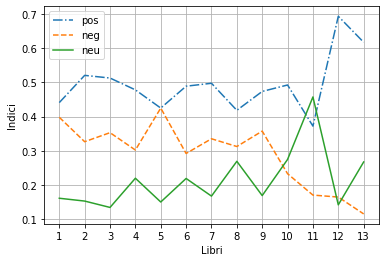

In [82]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(1,14)
plt.plot(X,pos_index,'-.',label='pos')
plt.plot(X,neg_index, '--',label='neg')
plt.plot(X,neutral_index,'-',label='neu')
plt.legend()
plt.xticks(X)
plt.xlabel('Libri')
plt.ylabel('Indici')
plt.grid()
plt.savefig('plots/afinn-bsi.png')
plt.show()  